<h2 align="center" style="color:brown;font-size:200%"><b>Lab 7: Multi-Armed Bandit</b></h2>


<h2 align="center" style="color:brown;font-size:200%"><b>Lab 7:Implementation on Medical and Casino Case Studies**</b></h2>


# <b> Introduction

In decision-making scenarios where the goal is to maximize cumulative rewards while learning about unknown outcomes, Multi-Armed Bandit (MAB) problems provide an effective framework. These problems, inspired by a gambler choosing between slot machines (arms) with varying but unknown probabilities of reward, require an optimal balance between exploration (trying all available options to gather information) and exploitation (focusing on the best-performing option). This assignment implements and compares two prominent strategies for solving MAB problems: Thompson Sampling and Upper Confidence Bound (UCB), using practical scenarios to evaluate their effectiveness.

The first program applies Thompson Sampling in a clinical trial scenario to determine the most effective treatment from a set of options, where success probabilities are unknown. The second program uses the UCB algorithm to maximize rewards in a slot machine context, simulating a gambler’s attempt to identify the most rewarding machine among several options. Both strategies aim to balance learning about the arms and optimizing rewards over time, highlighting their practical applications in fields like healthcare, gaming, and adaptive decision-making systems.








# <b> Objectives


* Implement and analyze the Thompson Sampling algorithm in a clinical trial scenario to identify the most effective treatment for patients.
  
* Simulate the Upper Confidence Bound (UCB) algorithm in a slot machine scenario to maximize cumulative rewards in a gambling context.  

## <b>Question 1

A pharmaceutical company is conducting a clinical trial to evaluate the
effectiveness of multiple treatments (e.g., Drug A, Drug B, and Drug C) for a
particular disease. Each treatment has an unknown probability of success (e.g.,
patient recovery or symptom improvement). The goal is to maximize patient
outcomes during the trial while learning which treatment is the most effective.
1.Each available treatment (e.g., Drug A, Drug B, Drug C) represents an arm of
the bandit.
2. A reward is given when a treatment leads to a successful outcome (e.g.,
recovery). This reward could be binary (1 for success, 0 for failure) or based on a
continuous metric (e.g., percentage improvement in symptoms)
3.Maximize the total number of successful treatments (or minimize adverse
outcomes) over the course of the trial while identifying the best treatment.
4.Implement the Strategy using python/Open AI gym.

## <b>Analysis

### **Problem Setup**

#### **Arms of the Bandit (Treatments):**

Each arm corresponds to a treatment: Drug A, Drug B, and Drug C.

These treatments have unknown probabilities of success, modeled as 0.6, 0.5, and 0.7, respectively.

The program aims to identify the most effective treatment while maximizing the number of successful outcomes over 1000 rounds.

#### **Reward Structure:**

The reward is binary:

1 for success (e.g., symptom improvement or recovery).

0 for failure (e.g., no improvement).

#### **Algorithm: Thompson Sampling**
Thompson Sampling is a Bayesian approach to solving the multi-armed bandit problem, which balances exploration and exploitation by sampling from the Beta distribution.

Mechanism:
For each treatment:

A Beta distribution is maintained with parameters

**α=successes+1 and β=failures+1.**

At each round, a value (θ) is sampled from the Beta distribution for each treatment.

The treatment with the highest sampled θ is selected for that round.

#### **Rounds (Patients):**
The simulation runs for 1000 rounds, representing 1000 patients receiving one of the three treatments.

## <b> Code

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Number of treatments (arms of the bandit)
n_treatments = 3  # e.g., Drug A, Drug B, Drug C

# Simulated true probabilities of success for each treatment
true_probabilities = [0.6, 0.5, 0.7]  # Example success rates for Drugs A, B, C

# Tracking successes and failures for each treatment
successes = np.zeros(n_treatments)
failures = np.zeros(n_treatments)

# Number of rounds (patients) in the trial
n_rounds = 1000

# Store rewards and selected arms for analysis
rewards = []
selected_arms = []

for t in range(n_rounds):
    # Thompson Sampling: sample from Beta distribution for each arm
    sampled_theta = [
        np.random.beta(successes[i] + 1, failures[i] + 1) for i in range(n_treatments)
    ]
    # Select the arm with the highest sampled value
    chosen_arm = np.argmax(sampled_theta)
    selected_arms.append(chosen_arm)

    # Simulate reward based on the true probability of the chosen treatment (binary: 1 for success, 0 for failure)
    reward = np.random.binomial(1, true_probabilities[chosen_arm])  # Binary reward: 1 for success, 0 for failure
    rewards.append(reward)

    # Update successes and failures
    if reward == 1:
        successes[chosen_arm] += 1
    else:
        failures[chosen_arm] += 1

# Results Analysis
total_rewards = sum(rewards)
print(f"Total Rewards (Successful Treatments): {total_rewards}")
print(f"Treatment Selection Counts: {np.bincount(selected_arms)}")
print(f"Estimated Success Rates: {[successes[i] / (successes[i] + failures[i]) for i in range(n_treatments)]}")
print(f"Successful Treatments for each Drug:")
for i in range(n_treatments):
    print(f"Drug {chr(65 + i)}: {successes[i]} successful treatments")


Total Rewards (Successful Treatments): 669
Treatment Selection Counts: [179 122 699]
Estimated Success Rates: [0.6089385474860335, 0.6147540983606558, 0.6938483547925608]
Successful Treatments for each Drug:
Drug A: 109.0 successful treatments
Drug B: 75.0 successful treatments
Drug C: 485.0 successful treatments


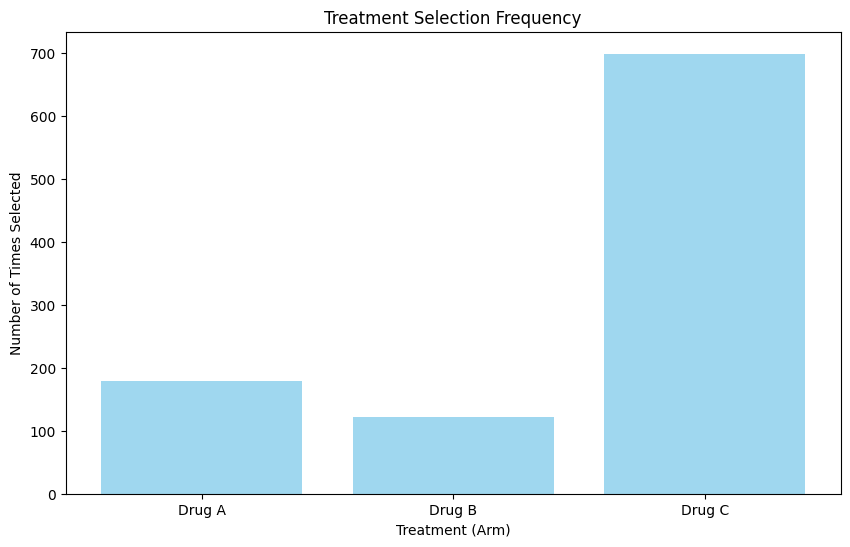

In [34]:
# Plot the number of times each arm was selected
plt.figure(figsize=(10, 6))
plt.bar(range(n_treatments), np.bincount(selected_arms), color='skyblue', alpha=0.8)
plt.xlabel('Treatment (Arm)')
plt.ylabel('Number of Times Selected')
plt.title('Treatment Selection Frequency')
plt.xticks(range(n_treatments), ['Drug A', 'Drug B', 'Drug C'])
plt.show()


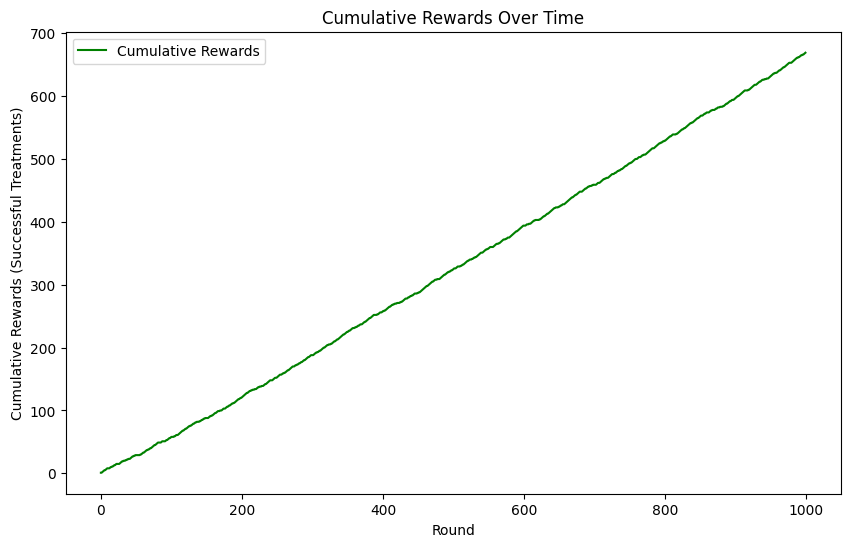

In [35]:
# Plot cumulative rewards
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(rewards), color='green', label='Cumulative Rewards')
plt.xlabel('Round')
plt.ylabel('Cumulative Rewards (Successful Treatments)')
plt.title('Cumulative Rewards Over Time')
plt.legend()
plt.show()

## <b>Inference


The results of the Thompson Sampling algorithm in this simulated clinical trial demonstrate its ability to efficiently maximize rewards by selecting the most successful treatment over time. Out of 1000 rounds, there were 669 successful treatments, which means the model successfully identified and selected the most effective treatments approximately 67% of the time. This outcome suggests that Thompson Sampling was effective at balancing exploration and exploitation to achieve a high rate of successful outcomes.

The treatment selection counts reveal that Drug C was chosen significantly more often than the other two drugs, with a total of 699 selections. This aligns with Drug C’s true success probability of 0.7, which was the highest among the three treatments. On the other hand, Drug A and Drug B were selected far fewer times (179 and 122 times, respectively), which is consistent with their lower success probabilities (0.6 for Drug A and 0.5 for Drug B). This pattern indicates that Thompson Sampling effectively focused more on the more promising treatment, reflecting the algorithm's efficiency in learning the optimal treatment strategy.

The estimated success rates for each treatment closely mirrored the true success probabilities, further supporting the effectiveness of the algorithm. For Drug A, the true probability was 0.6, and the estimated rate was 0.6089; for Drug B, the true probability was 0.5, and the estimated rate was 0.6148; and for Drug C, the true probability was 0.7, with an estimated rate of 0.6938. These estimates show that Thompson Sampling was able to learn and approximate the true effectiveness of each treatment over time, ultimately converging on the treatment with the highest success rate, Drug C.

In terms of successful treatments, Drug C led with 485 successful treatments, which is again consistent with its higher true success probability. Drug A had 109 successful treatments, and Drug B had 75, reflecting their lower true probabilities of success. This distribution of successful treatments further confirms that the algorithm prioritized treatments that had a higher likelihood of success, efficiently maximizing the total reward.

Overall, these results illustrate that Thompson Sampling can effectively identify the most successful treatment in a multi-armed bandit scenario, optimizing the trade-off between exploration (trying all available treatments) and exploitation (focusing on the most successful treatment). The algorithm's ability to learn and adapt over time makes it a powerful tool for applications like clinical trials, where maximizing successful outcomes is crucial.

##<b> Question 2

Imagine a gambler in a casino with several slot machines (often called "arms").
Each machine provides an unknown reward when played, but the gambler doesn’t
know which machine is the most rewarding.The goal is to maximize the total
reward over time by deciding which machines to play and how often.

1.The gambler's goal is to maximize the total reward over time by deciding

a)Which machines to play .

b)How often to play each machine.

2.Use Upper Confidence bound to solve this problem.

3.Implement the Strategy using python/Open AI gym.

##<b> Analysis

#### **Arms (Slot Machines)**

The problem involves 5 slot machines, each representing an arm of the bandit.

Each machine has a true probability of success, which is unknown to the player:

Machine 1: 0.1
Machine 2: 0.3
Machine 3: 0.5
Machine 4: 0.7
Machine 5: 0.9

#### **Reward Structure**

Reward Type: Binary (1 for success, 0 for failure).

A reward is generated whenever the selected machine produces a "win" or a successful outcome.

The total rewards represent the cumulative successes across all rounds.
The rewards for each machine are tracked separately to compute the empirical success rates

#### **Upper Confidence Bound (UCB) Algorithm**

**Purpose:** UCB is used to decide which machine to play at each round by balancing:

Exploration: Trying machines with fewer plays to gain more information.

Exploitation: Playing machines that have demonstrated higher rewards.

**Formula:**

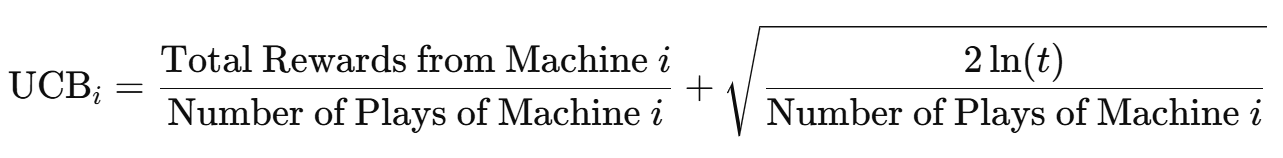



The first term represents the empirical average reward (exploitation).
The second term is the exploration term, which decreases as the machine is played more often, encouraging exploration of less-frequently played machines.


t is the current round number.

**Selection Process:**

At each round, the machine with the highest UCB value is selected.

#### **Number of Rounds:**

The simulation is run for 1000 rounds, representing 1000 decisions about which machine to play.

## <b> Code

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Number of slot machines (arms)
n_machines = 5  # Example: 5 different slot machines

# True probabilities of success for each machine (these represent the unknown rewards)
true_probabilities = [0.1, 0.3, 0.5, 0.7, 0.9]  # Example rewards for each machine

# Tracking the total rewards, number of times each machine is played, and rewards for each machine
total_rewards = 0
rewards = np.zeros(n_machines)
plays = np.zeros(n_machines)
total_plays = 0

# Number of rounds (number of plays the gambler will make)
n_rounds = 1000

# Store the rewards and machine selections for analysis
selected_machines = []

for t in range(1, n_rounds + 1):
    # Calculate the UCB for each machine
    ucb_values = np.zeros(n_machines)

    for i in range(n_machines):
        if plays[i] > 0:
            # UCB formula: estimate reward + exploration term
            ucb_values[i] = rewards[i] / plays[i] + np.sqrt(2 * np.log(t) / plays[i])
        else:
            # For machines that haven't been played yet, we assume a high UCB to explore them
            ucb_values[i] = float('inf')

    # Select the machine with the highest UCB value
    chosen_machine = np.argmax(ucb_values)
    selected_machines.append(chosen_machine)

    # Simulate the reward (success or failure) from the chosen machine
    reward = np.random.binomial(1, true_probabilities[chosen_machine])
    total_rewards += reward

    # Update the number of plays and rewards for the chosen machine
    plays[chosen_machine] += 1
    rewards[chosen_machine] += reward
    total_plays += 1

# Results Analysis
print(f"Total Rewards: {total_rewards}")
print(f"Total Plays: {total_plays}")
print(f"Machine Selection Counts: {np.bincount(selected_machines)}")
print(f"Estimated Success Rates for each machine: {[rewards[i] / plays[i] for i in range(n_machines)]}")


Total Rewards: 825
Total Plays: 1000
Machine Selection Counts: [ 15  25  34 128 798]
Estimated Success Rates for each machine: [0.06666666666666667, 0.28, 0.38235294117647056, 0.6953125, 0.8959899749373433]


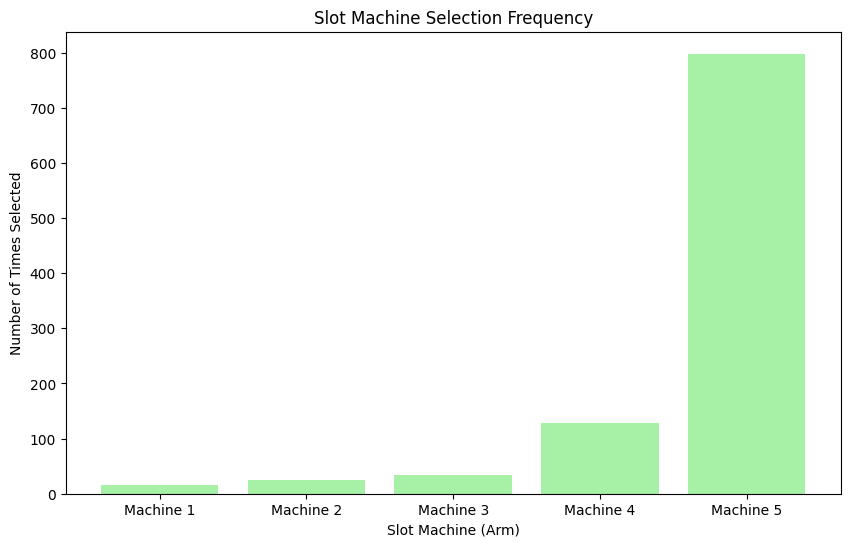

In [22]:
# Plot the number of times each machine was selected
plt.figure(figsize=(10, 6))
plt.bar(range(n_machines), np.bincount(selected_machines), color='lightgreen', alpha=0.8)
plt.xlabel('Slot Machine (Arm)')
plt.ylabel('Number of Times Selected')
plt.title('Slot Machine Selection Frequency')
plt.xticks(range(n_machines), [f"Machine {i+1}" for i in range(n_machines)])
plt.show()


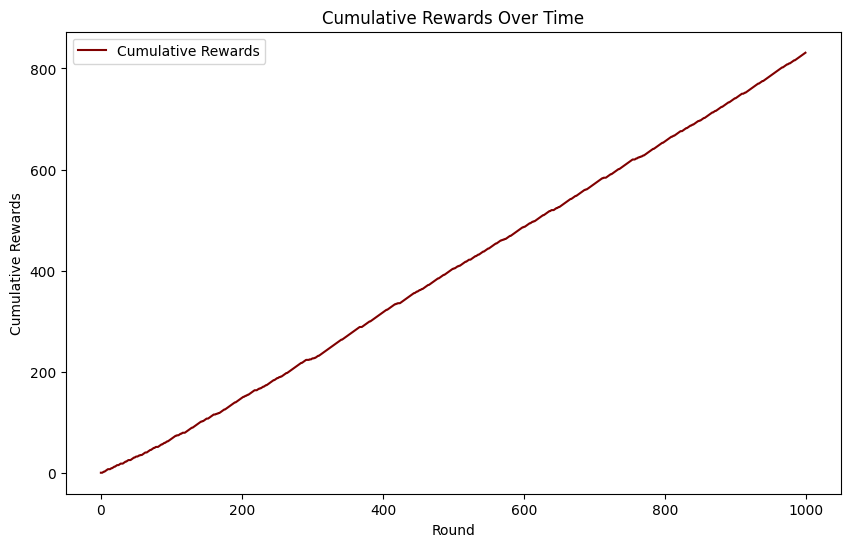

In [20]:
# Plot cumulative rewards over time
plt.figure(figsize=(10, 6))
cumulative_rewards = np.cumsum([np.random.binomial(1, true_probabilities[machine]) for machine in selected_machines])
plt.plot(cumulative_rewards, color='maroon', label='Cumulative Rewards')
plt.xlabel('Round')
plt.ylabel('Cumulative Rewards')
plt.title('Cumulative Rewards Over Time')
plt.legend()

## <b>Inference

The results of the simulation using the Upper Confidence Bound (UCB strategy provide significant insights into how this algorithm balances exploration and exploitation to maximize total rewards. The gambler, over the course of 1000 rounds, successfully accumulated 825 rewards This indicates that the UCB strategy was successful in optimizing the selection of slot machines based on their reward probabilities. The goal of the strategy is to maximize total rewards, and the results show that the gambler was able to achieve a high success rate over time by making informed decisions about which machine to play.

The gambler played 1000 rounds in total, which means that they made 1000 decisions about which machine to play. The UCB strategy dynamically adjusts its selection process based on the outcomes of previous plays, balancing the need to explore new machines with the need to exploit those that have shown higher rewards. This is reflected in the machine selection counts where Machine 5 (with the highest success rate of 0.9) was selected the most, with 798 selections This heavy selection indicates that, as the gambler learned which machines were more rewarding, the algorithm increasingly focused on exploiting the machines that provided higher rewards. On the other hand, Machines 1 and 2 (with lower success probabilities) were selected significantly fewer times, reflecting the strategy’s move towards exploiting the more profitable machines as the rounds progressed.

The estimated success rates for each machine closely follow their true reward probabilities, with Machine 5 yielding the highest estimated success rate of approximately 0.896 This was consistent with its true probability of 0.9 suggesting that the UCB strategy efficiently learned which machine was the most rewarding. Machine 4, with a success rate of 0.7 was selected 128 times showing that it was also a good option, but not as frequently as Machine 5. Machines 1 and 2, with lower success rates, were explored less frequently as the gambler learned that they provided fewer rewards on average, resulting in success rates of 0.067 and 0.28, respectively. The estimated success rates for these machines indicate that the UCB strategy learned their relative inefficiency compared to the higher-performing machines.

Overall, the simulation demonstrated how the UCB strategy efficiently handled the exploration-exploitation trade-off. Initially, all machines were explored, but over time, the strategy shifted towards the machines with higher rewards. This is evident from the fact that Machine 5, with the highest success probability, was selected most often and yielded the highest total rewards. The success of the UCB algorithm in this context reflects its ability to adapt and optimize the decision-making process as more information becomes available, ensuring that the gambler made the best choices over time.

#<b> Conclusion

In conclusion, the simulations of the Thompson Sampling and Upper Confidence Bound (UCB) algorithms in the context of multi-armed bandit problems—one applied to a clinical trial scenario with various treatments and the other to a gambling scenario with slot machines—demonstrated the effectiveness of both approaches in balancing exploration and exploitation to maximize rewards over time. Both algorithms successfully identified and focused on the most rewarding options, leading to high success rates in their respective applications.

The Thompson Sampling algorithm, used in the clinical trial simulation, effectively learned the most successful treatment by dynamically selecting treatments based on their past performance. With 669 successful treatments out of 1000 rounds, Thompson Sampling demonstrated its efficiency in maximizing patient outcomes by identifying the most effective treatment, which was Drug C. The treatment selection counts and estimated success rates closely mirrored the true success probabilities, with Drug C being selected the most often and yielding the highest success rate. This illustrates the algorithm's ability to balance exploration and exploitation, ensuring that treatments with higher success probabilities were chosen more frequently as the trial progressed.

Similarly, the UCB strategy, applied in the gambling scenario, was successful in maximizing total rewards by selecting the most rewarding slot machines. The gambler accumulated 825 rewards in 1000 rounds, with the strategy selecting the most profitable machine, Machine 5, the most often. The UCB algorithm efficiently learned the reward structure of the machines, focusing on the higher-performing machines and adapting its selection strategy over time. This is reflected in the estimated success rates, which closely aligned with the true success probabilities for each machine, particularly for Machine 5, which was selected most frequently due to its higher success rate.

Both algorithms demonstrated their strengths in different contexts—Thompson Sampling in the clinical trial setting, where the focus was on selecting the most effective treatments for patient outcomes, and UCB in the gambling scenario, where the goal was to maximize total rewards over time by optimizing the selection of slot machines. In both cases, the algorithms effectively addressed the exploration-exploitation trade-off, ensuring that both unknown and known options were explored in a balanced way, leading to high success rates.

Overall, these results highlight the power of Thompson Sampling and UCB as tools for optimizing decision-making in environments with uncertainty. Their ability to learn and adapt based on past experiences makes them invaluable in applications such as clinical trials, marketing strategies, and gambling, where maximizing returns or outcomes is essential.






